In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


In [54]:
L= (10)**(-6)#lenth of cell
a= 2.5*(10**-10)#burger vector or spacing between points
D= int(L/a)+1 #No. of positions in the cell
n=30 #No. of dislocations
G=5.5*(10**10)
v=0.324
density = n/L**2
stress=0.3*(10**9) #Externally applied shear stress sigma-xy 
print(L,a,D,n,G,v,density)

1e-06 2.5e-10 4000 30 55000000000.0 0.324 30000000000000.0


In [55]:
x=np.arange(0,D) 
print(x)
b=np.zeros(D)
b[0:int(D/2)]=1
b[int(D/2):]=-1
import random
random.shuffle(b)
print(b)

[   0    1    2 ... 3997 3998 3999]
[ 1.  1.  1. ...  1.  1. -1.]


In [56]:
import random
y=np.zeros(D)
# Putting n random values between[1,D] in y representing n dislocations
i= random.sample(list(np.arange(1,D+1)),n)
j= random.sample(list(x),n)
for p in range (0,n):
    k=j[p]
    y[k]=i[p]
print(y)
np.unique(y).shape
#Don't Panic, it includes zero also.

[0. 0. 0. ... 0. 0. 0.]


(31,)

In [57]:
initloc= pd.DataFrame((x,y,b),['X','Y','B'])
#Making a data frame containing positions of dislocations and the sign of their burger vector 
#Here they are asigned to a index which represents positions for dislocations in the structure.
initloc= initloc.T
initloc.loc[:,'B'][initloc['Y']==0]=0 #Assigning "burger vectors sign" to zero for rows in which there is no dislocation.
print(initloc[initloc['Y']!=0].count())
#count of rows where y is not equal to zero for confirming number of dislocations
print(initloc)

X    30
Y    30
B    30
dtype: int64
           X    Y    B
0        0.0  0.0  0.0
1        1.0  0.0  0.0
2        2.0  0.0  0.0
3        3.0  0.0  0.0
4        4.0  0.0  0.0
...      ...  ...  ...
3995  3995.0  0.0  0.0
3996  3996.0  0.0  0.0
3997  3997.0  0.0  0.0
3998  3998.0  0.0  0.0
3999  3999.0  0.0  0.0

[4000 rows x 3 columns]


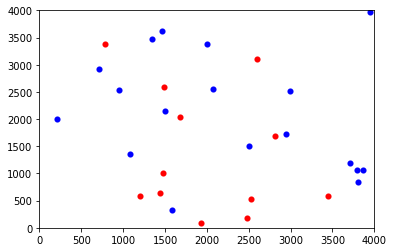

In [58]:
plt.scatter(initloc[initloc['B']>0]['X'],initloc[initloc['B']>0]['Y'],marker='o',c='b',linewidths=.1)
plt.scatter(initloc[initloc['B']<0]['X'],initloc[initloc['B']<0]['Y'],marker='o',c='r',linewidths=.1)
plt.xlim(0,4000)
plt.ylim(0,4000)
plt.savefig("Initial Location.png")

In [59]:
cond = initloc[initloc['B']!=0] #separate dataframe in which there are only dislocations and not all the points
ind = cond.index #index of cond dataframe act as unique identity of dislocation and will be used to iterate through each dislocation
print(ind)
print(cond.loc[ind[0],'X']) #example of how index can be used 
cond.to_csv("Initital Location.csv") #saving inital location to a csv file
print(cond)

Int64Index([ 213,  715,  778,  948, 1082, 1196, 1345, 1445, 1466, 1477, 1487,
            1500, 1581, 1676, 1928, 2002, 2068, 2475, 2505, 2525, 2599, 2820,
            2941, 2989, 3446, 3715, 3788, 3811, 3867, 3955],
           dtype='int64')
213.0
           X       Y    B
213    213.0  2004.0  1.0
715    715.0  2922.0  1.0
778    778.0  3381.0 -1.0
948    948.0  2533.0  1.0
1082  1082.0  1352.0  1.0
1196  1196.0   587.0 -1.0
1345  1345.0  3467.0  1.0
1445  1445.0   637.0 -1.0
1466  1466.0  3618.0  1.0
1477  1477.0  1011.0 -1.0
1487  1487.0  2582.0 -1.0
1500  1500.0  2153.0  1.0
1581  1581.0   332.0  1.0
1676  1676.0  2030.0 -1.0
1928  1928.0    93.0 -1.0
2002  2002.0  3380.0  1.0
2068  2068.0  2556.0  1.0
2475  2475.0   172.0 -1.0
2505  2505.0  1513.0  1.0
2525  2525.0   524.0 -1.0
2599  2599.0  3114.0 -1.0
2820  2820.0  1682.0 -1.0
2941  2941.0  1717.0  1.0
2989  2989.0  2517.0  1.0
3446  3446.0   590.0 -1.0
3715  3715.0  1186.0  1.0
3788  3788.0  1060.0  1.0
3811  3811.0   847.0  1

In [60]:
count=0
fx= pd.DataFrame()#storing force data
pos=pd.DataFrame()#storing position data
pos =pos.append(cond)
print(pos)

           X       Y    B
213    213.0  2004.0  1.0
715    715.0  2922.0  1.0
778    778.0  3381.0 -1.0
948    948.0  2533.0  1.0
1082  1082.0  1352.0  1.0
1196  1196.0   587.0 -1.0
1345  1345.0  3467.0  1.0
1445  1445.0   637.0 -1.0
1466  1466.0  3618.0  1.0
1477  1477.0  1011.0 -1.0
1487  1487.0  2582.0 -1.0
1500  1500.0  2153.0  1.0
1581  1581.0   332.0  1.0
1676  1676.0  2030.0 -1.0
1928  1928.0    93.0 -1.0
2002  2002.0  3380.0  1.0
2068  2068.0  2556.0  1.0
2475  2475.0   172.0 -1.0
2505  2505.0  1513.0  1.0
2525  2525.0   524.0 -1.0
2599  2599.0  3114.0 -1.0
2820  2820.0  1682.0 -1.0
2941  2941.0  1717.0  1.0
2989  2989.0  2517.0  1.0
3446  3446.0   590.0 -1.0
3715  3715.0  1186.0  1.0
3788  3788.0  1060.0  1.0
3811  3811.0   847.0  1.0
3867  3867.0  1065.0  1.0
3955  3955.0  3962.0  1.0


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


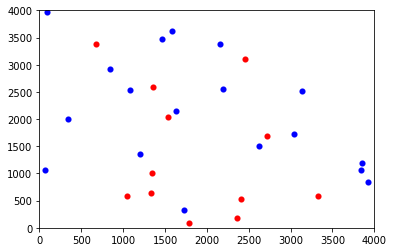

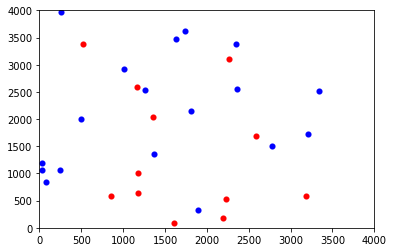

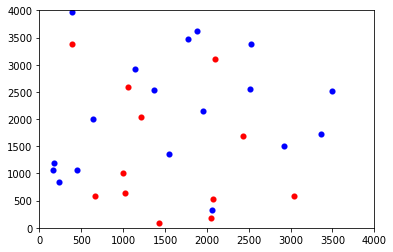

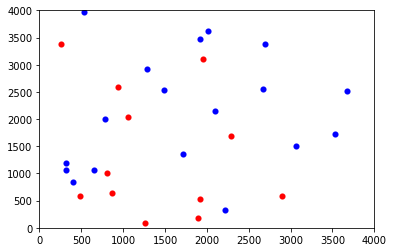

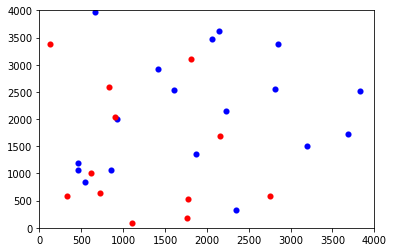

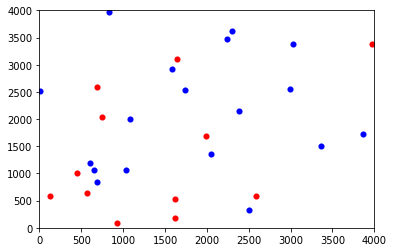

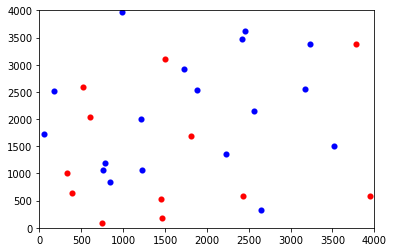

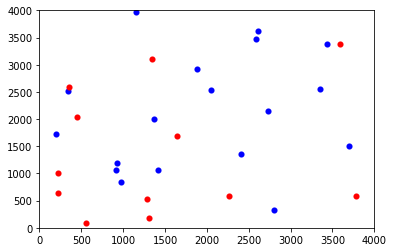

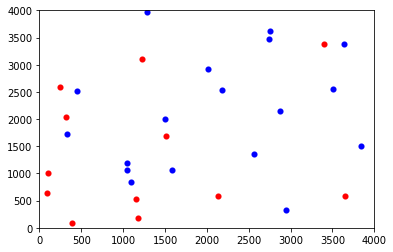

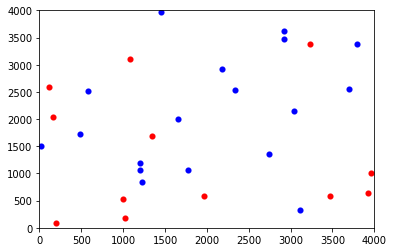

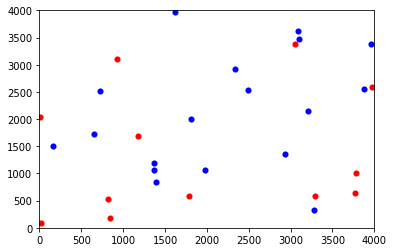

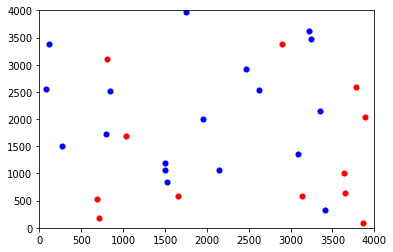

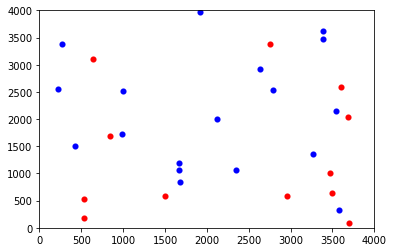

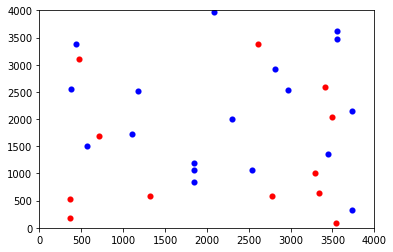

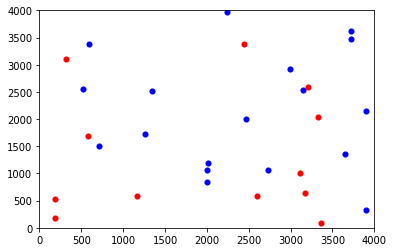

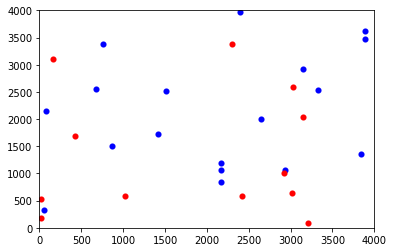

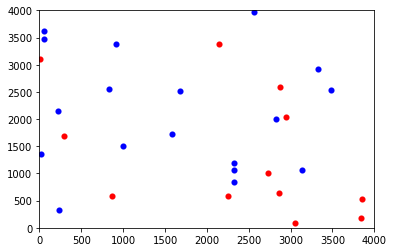

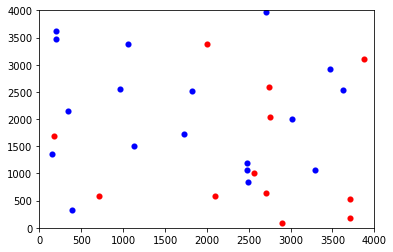

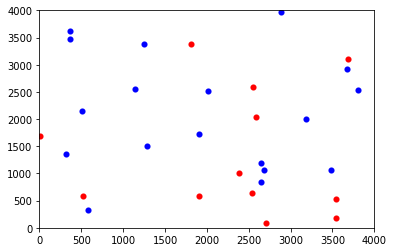

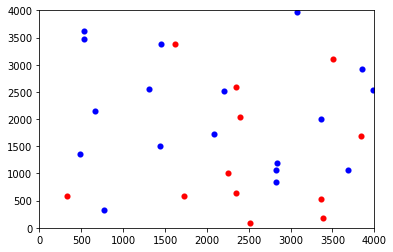

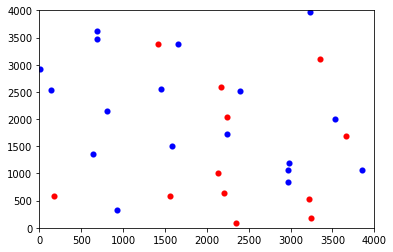

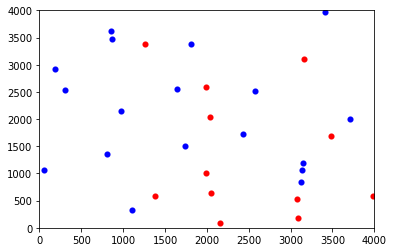

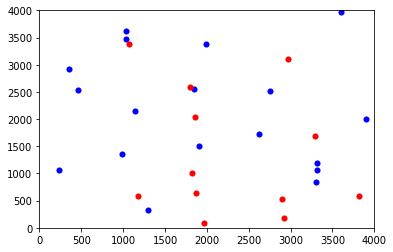

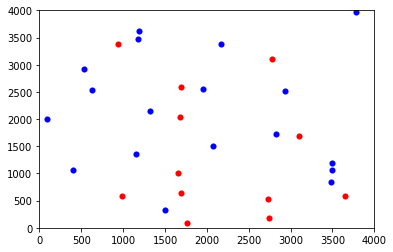

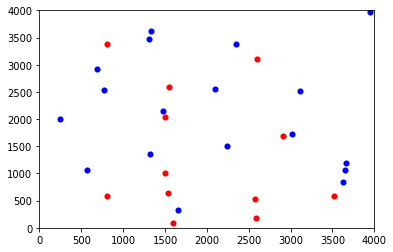

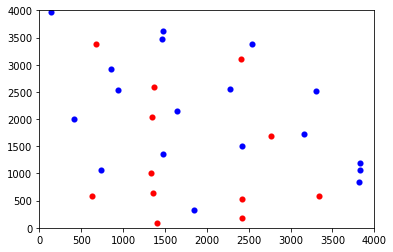

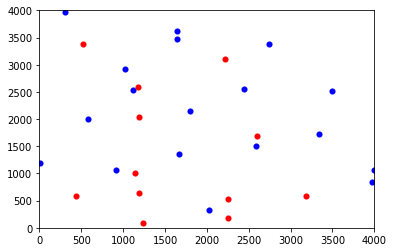

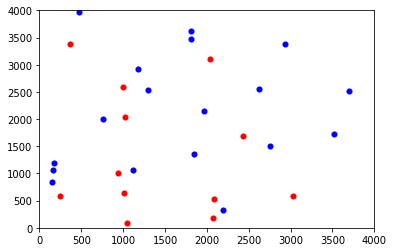

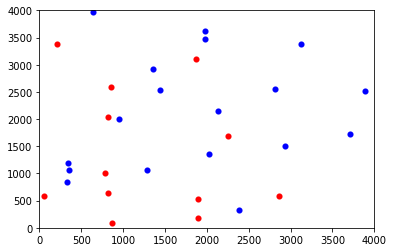

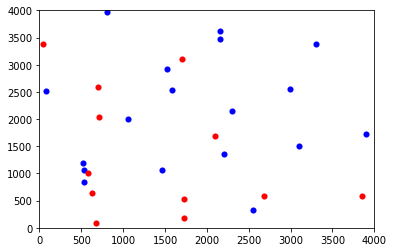

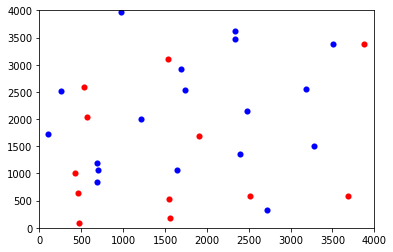

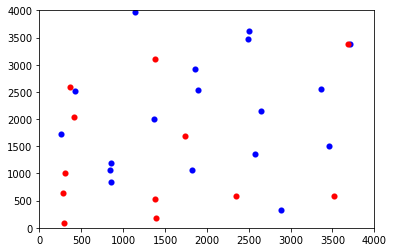

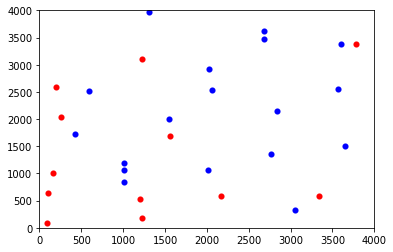

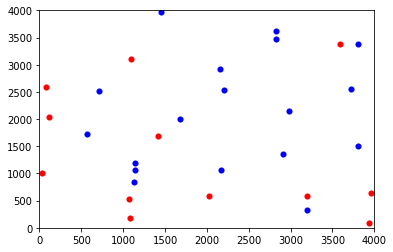

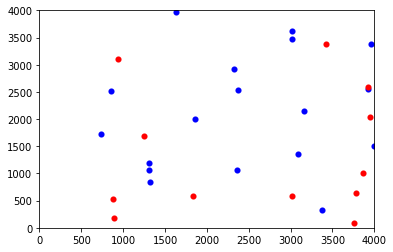

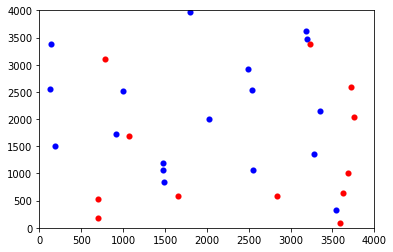

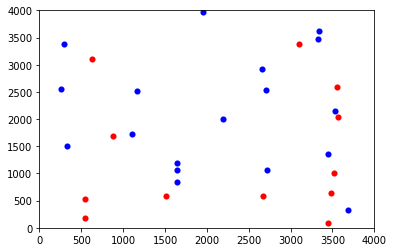

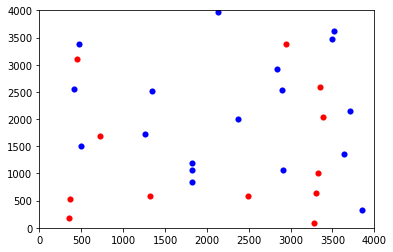

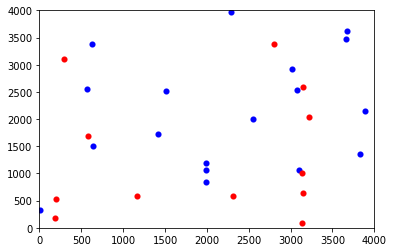

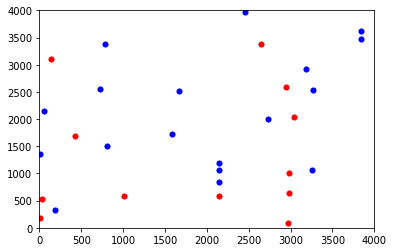

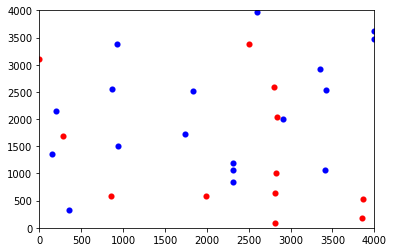

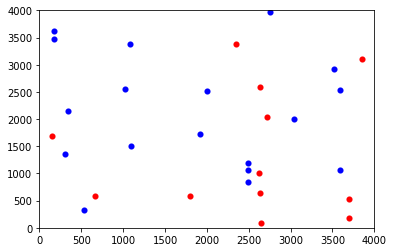

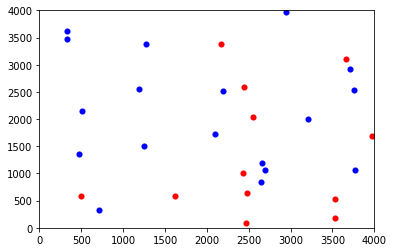

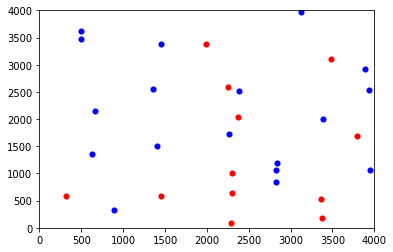

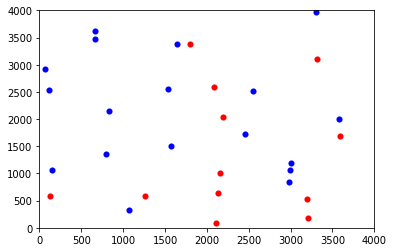

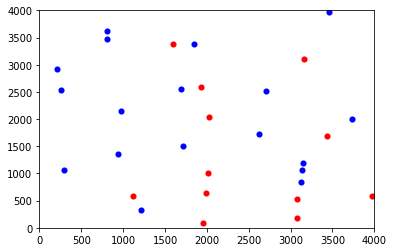

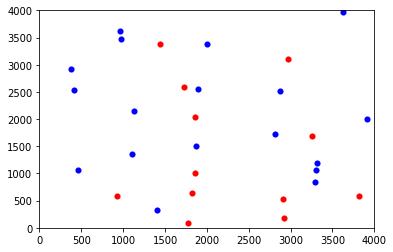

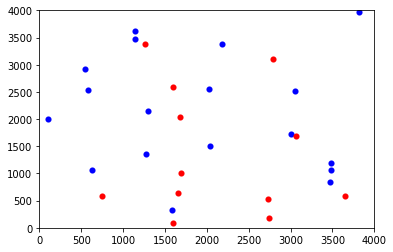

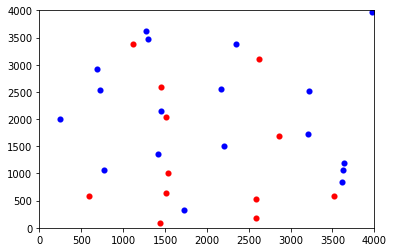

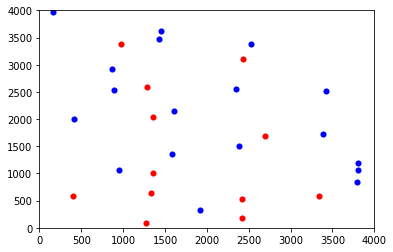

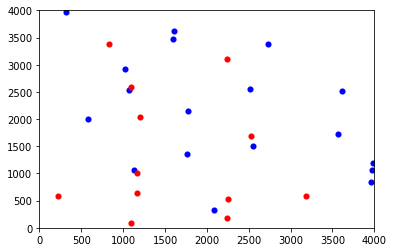

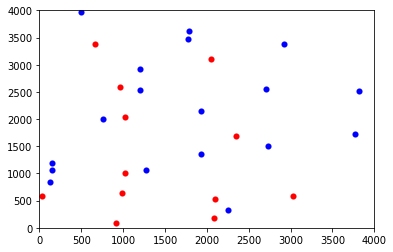

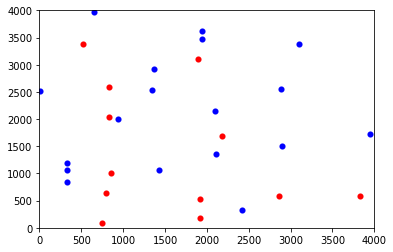

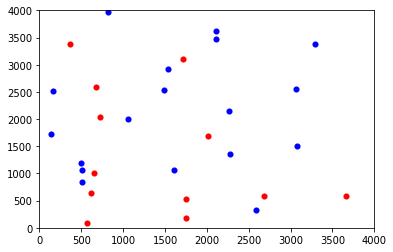

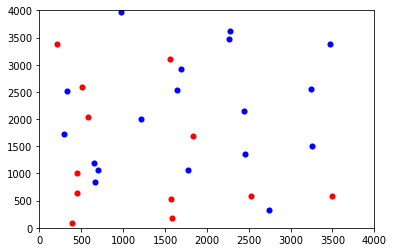

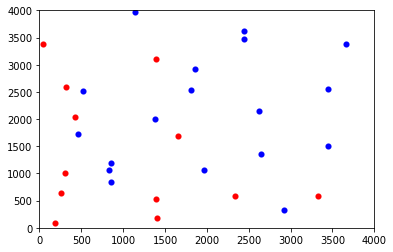

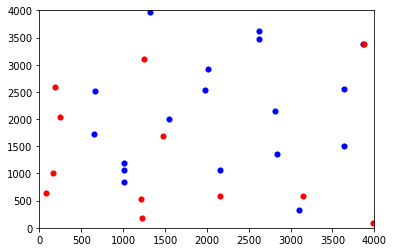

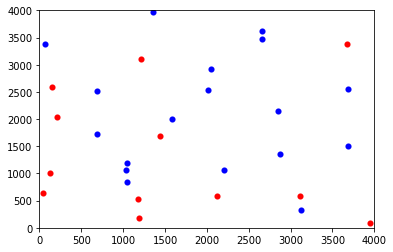

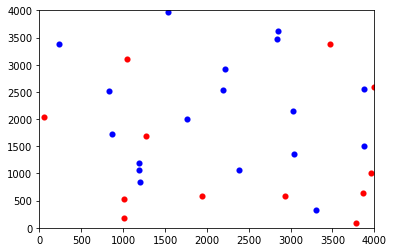

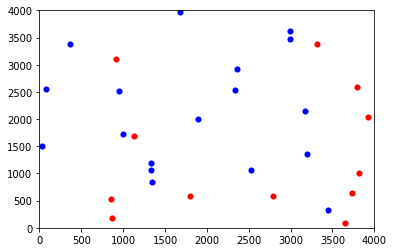

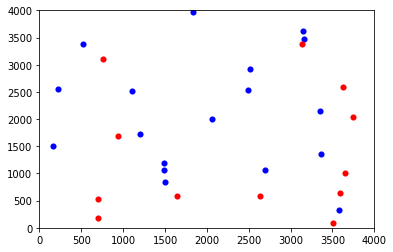

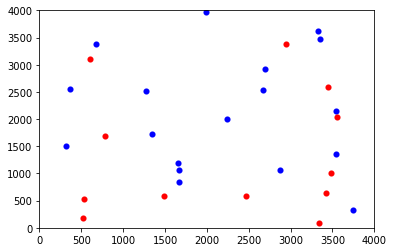

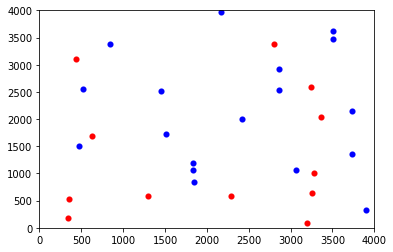

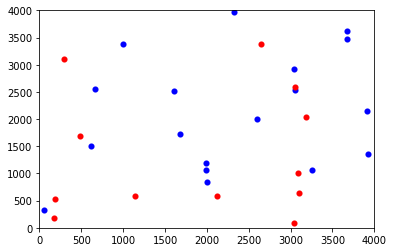

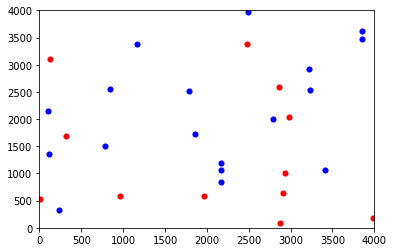

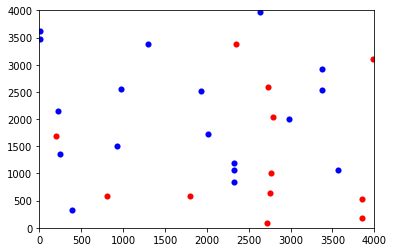

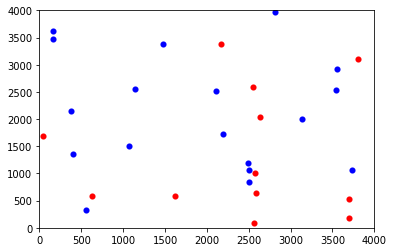

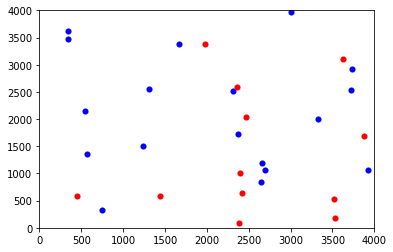

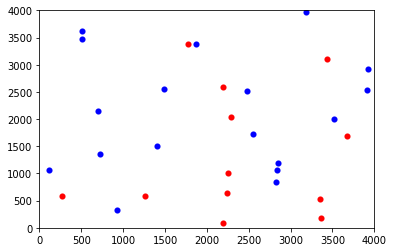

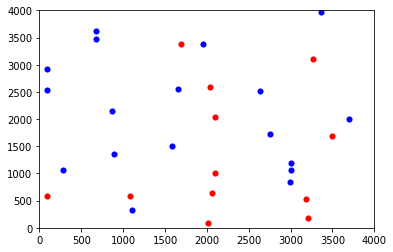

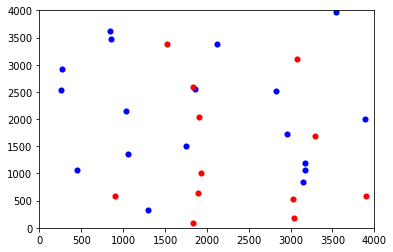

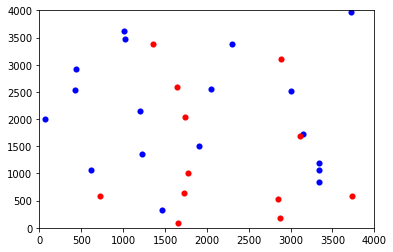

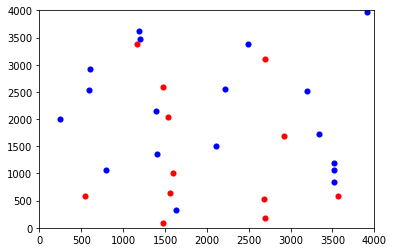

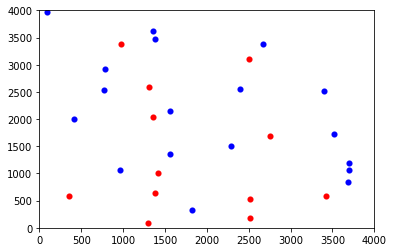

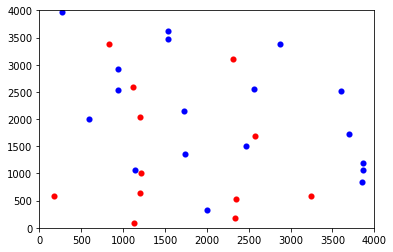

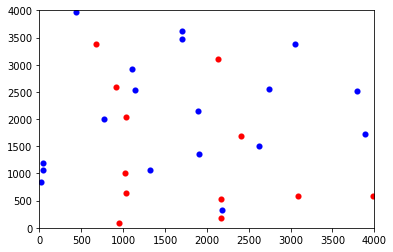

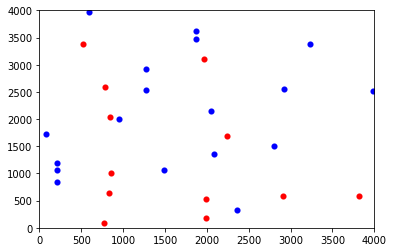

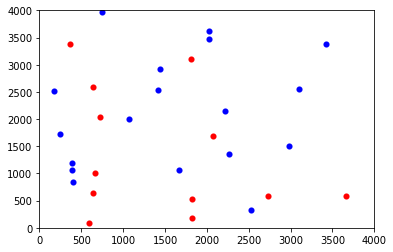

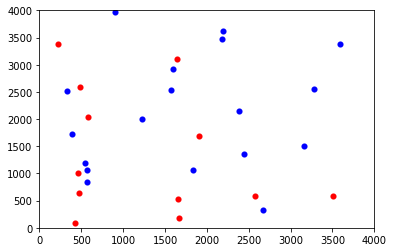

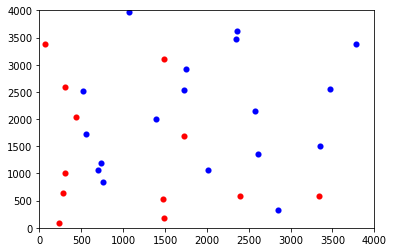

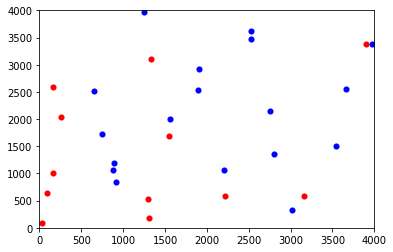

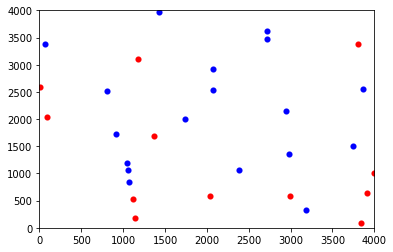

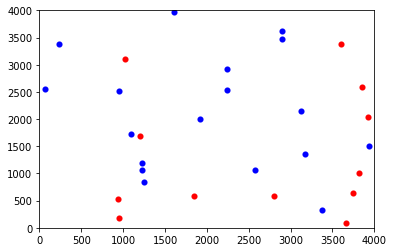

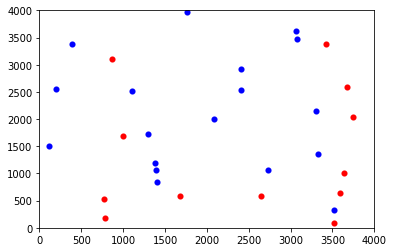

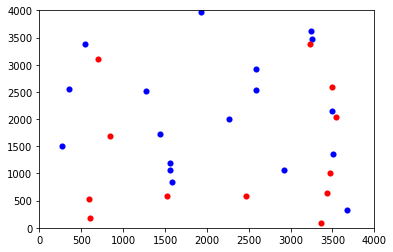

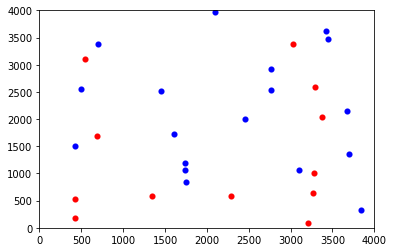

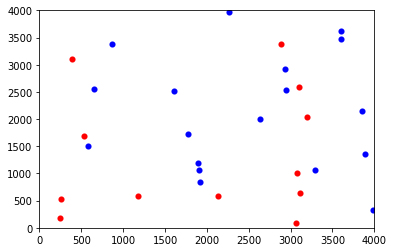

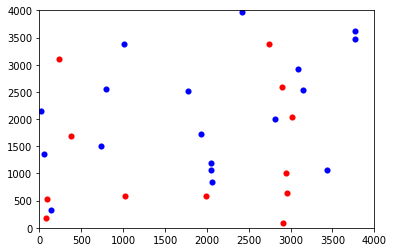

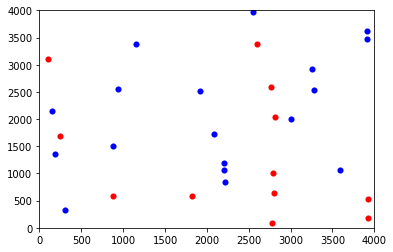

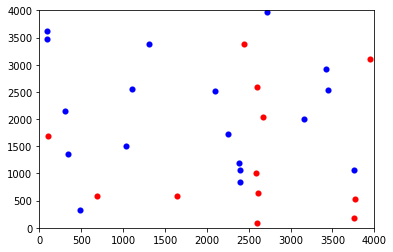

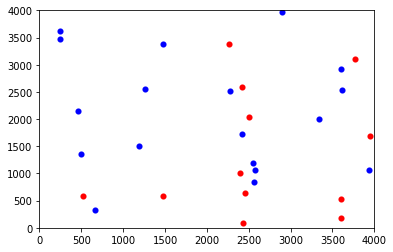

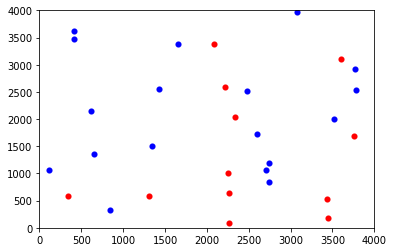

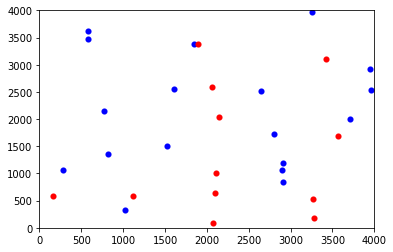

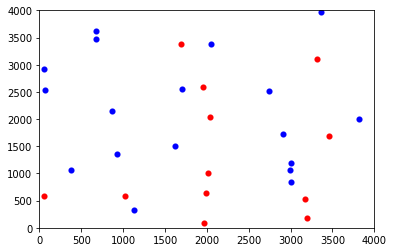

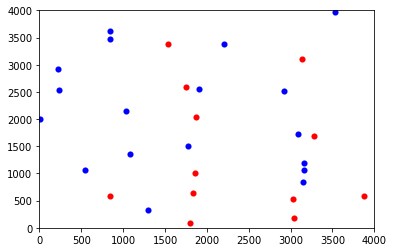

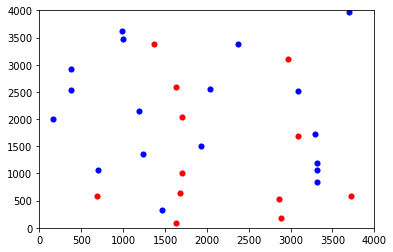

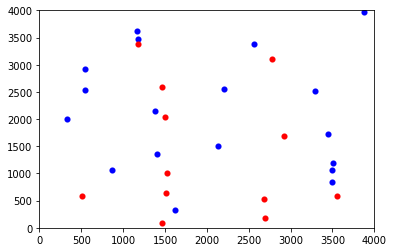

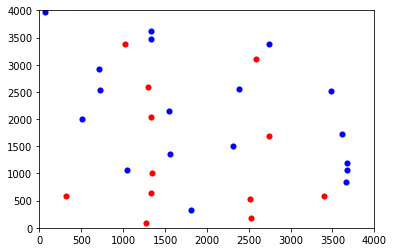

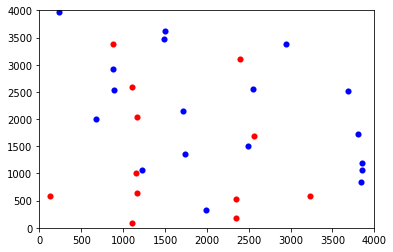

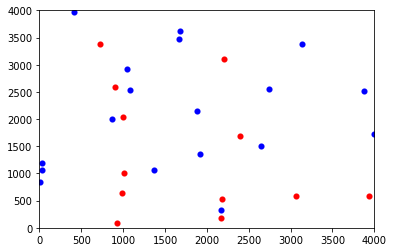

In [61]:
#force code
c=G/(2*math.pi*(1-v))
dxmax = 200*a
ntstep= 100#no. of time steps

for m in range (count,(count+ntstep)):#instead of taking(0,ntstep) I have taken this so that for each timestep has a unique no.
    n=len(cond.index)
    fmax=0
   
    for i in  range (0,n):
        fx.loc[i,m]=0
        for j in range(0,n):
            if i!=j:
                dx= (cond.iloc[i]['X']-cond.iloc[j]['X'])*a #x[i]-x[j]
                dy= (cond.iloc[i]['Y']-cond.iloc[j]['Y'])*a #y[i]-y[j]
                dsq= (dx**2)+(dy**2)
                dist= dsq**0.5
                if cond.iloc[i]['Y']==cond.iloc[j]['Y'] and dist<=(6*a):#Dislocation anihilation
                    cond.loc[ind[i],'B']=0
                    cond.loc[ind[j],'B']=0
                    fx.loc[i,m]=0
                    fx.loc[j,m]=0
                
                ffx= (cond.iloc[i]['B'])*(cond.iloc[j]['B'])*a*a*c*dx*(dx**2-dy**2)/(dsq**2)#calculating force
                fx.loc[i,m]= fx.loc[i,m]+ffx
        fx.loc[i,m]=fx.loc[i,m]+(stress*a*(cond.iloc[i]['B']))#force due to external shear stress

        if abs(fx.loc[i,m])>fmax:
            fmax= abs(fx.loc[i,m])
    tstep = dxmax/fmax#size of time step
    
    for q in range(0,n):
        row=ind[q] #for each q ind[q] will give us unique no. of each dislocation which we can use to store and edit info.
        cond.loc[row,'X']=cond.loc[row,'X']+int(fx.loc[q,m]*tstep/a) #updating the x-coordinates of dislocations in integers
        #used int to remove movement across periodic boundaries
        if cond.loc[row,'X']>(D-1):
            cond.loc[row,['X']]-=D
        if cond.loc[row,'X']<0:
            cond.loc[row,['X']]+=D
        pos.loc[row,m]=0
        pos.loc[row,m]=cond.loc[row,'X']
    
    cond= cond[cond['B']!=0]#Removed the dislocation which are anihilated
    ind=cond.index
    plt.scatter(cond[cond['B']>0]['X'],cond[cond['B']>0]['Y'],marker='o',c='b',linewidths=.1)
    plt.scatter(cond[cond['B']<0]['X'],cond[cond['B']<0]['Y'],marker='o',c='r',linewidths=.1)
    plt.xlim(0,4000)
    plt.ylim(0,4000)
    plt.show()
count+=ntstep

In [62]:
print(fmax, tstep)
print(cond)
cond.to_csv("final location.csv")
print(cond.count())#counting the no. of dislocations

0.08165007330575445 6.123693216142668e-07
           X       Y    B
213    862.0  2004.0  1.0
715   1050.0  2922.0  1.0
778    719.0  3381.0 -1.0
948   1085.0  2533.0  1.0
1082  1913.0  1352.0  1.0
1196  3939.0   587.0 -1.0
1345  1669.0  3467.0  1.0
1445   982.0   637.0 -1.0
1466  1676.0  3618.0  1.0
1477  1005.0  1011.0 -1.0
1487   901.0  2582.0 -1.0
1500  1883.0  2153.0  1.0
1581  2171.0   332.0  1.0
1676   993.0  2030.0 -1.0
1928   926.0    93.0 -1.0
2002  3134.0  3380.0  1.0
2068  2737.0  2556.0  1.0
2475  2172.0   172.0 -1.0
2505  2651.0  1513.0  1.0
2525  2178.0   524.0 -1.0
2599  2209.0  3114.0 -1.0
2820  2402.0  1682.0 -1.0
2941  3995.0  1717.0  1.0
2989  3883.0  2517.0  1.0
3446  3071.0   590.0 -1.0
3715    33.0  1186.0  1.0
3788    29.0  1060.0  1.0
3811    12.0   847.0  1.0
3867  1373.0  1065.0  1.0
3955   410.0  3962.0  1.0
X    30
Y    30
B    30
dtype: int64


In [63]:
print(cond.count())

X    30
Y    30
B    30
dtype: int64


In [64]:
print(fx.shape)

(30, 100)


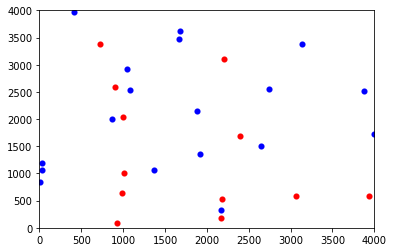

In [65]:
plt.scatter(cond[cond['B']>0]['X'],cond[cond['B']>0]['Y'],marker='o',c='b',linewidths=.1)
plt.scatter(cond[cond['B']<0]['X'],cond[cond['B']<0]['Y'],marker='o',c='r',linewidths=.1)
plt.xlim(0,4000)
plt.ylim(0,4000)
plt.savefig("Final location.png")

In [66]:
print(count)

100


In [67]:
fx.to_csv("funcvalue.csv")#contains force value for each dislocation(rows) for each timestep(columns)

In [68]:
pos.to_csv("posvalue.csv")#contains position of dislocations from initial to final timestep

In [69]:
print(pos.shape)

(30, 103)
